In [ ]:
pip install pandas mysql-connector-python


In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
connection = mysql.connector.connect(
    host="localhost",        # Your MySQL host, typically "localhost"
    user="root",             # Replace with your MySQL username (default is "root")
    password="@Nikhil85700", # Your MySQL password
    database="user_journey_data"  # Replace with the name of your database
)


In [ ]:
if connection.is_connected():
    print("Successfully connected to the database!")

In [ ]:
query = "SELECT * FROM front_visitors;"

# Execute the query and load data into a DataFrame
df = pd.read_sql(query, connection)

# Display the first few rows of the DataFrame
print(df.head())

In [ ]:
# Query to explore the 'front_interactions' table
query = "SELECT * FROM front_interactions LIMIT 10;"
df = pd.read_sql(query, connection)
print(df.head())


In [ ]:

query = "SELECT COUNT(*) AS total_interactions FROM front_interactions;"
df = pd.read_sql(query, connection)
print(df)


### Purpose
This query counts the total number of interactions recorded in the front_interactions table. Each record in this table corresponds to a unique event or interaction on the website, such as clicking a button or scrolling a page.

### Output
The query returned 1,625,367, which means there are 1,625,367 interactions recorded in the database.

### Key Insights
This gives us a baseline understanding of the scale of user activity logged on the platform.
We can use this total number to calculate percentages and analyze interaction patterns in later steps.

In [ ]:
query = "SELECT COUNT(DISTINCT visitor_id) AS unique_visitors FROM front_interactions;"
df = pd.read_sql(query, connection)
print(df)


### Purpose
This query calculates the total number of unique visitors who interacted with the website. The DISTINCT keyword ensures that each visitor_id is only counted once, even if they have multiple interactions recorded in the front_interactions table.

### Key Insights
The count of unique visitors provides insight into the total reach of the website within the dataset's timeframe.
Comparing this number with the total number of interactions can help analyze visitor engagement. For example:
A high ratio of interactions to visitors indicates high engagement.
A low ratio suggests limited activity per visitor.


In [98]:
query = """
SELECT event_name, COUNT(*) AS event_count
FROM front_interactions
GROUP BY event_name
ORDER BY event_count DESC
LIMIT 10;
"""
df = pd.read_sql(query, connection)
print(df)


                   event_name  event_count
0           login_email.click       145626
1   login_login.click.success       133318
2        login_password.click       108249
3           home_log_in.click        56994
4  login_google.click.success        49271
5         signup_policy.click        48343
6           signup_name.click        41694
7      login_rememberme.click        35613
8      login_login.click.fail        33956
9       signup_password.click        31985


### Purpose
This query identifies the most common event types logged in the front_interactions table. By grouping the data by event_name, we count how frequently each event type occurs. The result is ordered in descending order of event frequency to highlight the top 10 most frequent events.

### Key Insights
Most Frequent Events: The login_email.click and login_login.click.success events are the most frequent, suggesting a high level of user interaction with the login form.
Successful Login Events: The count of login_login.click.success (133,318) indicates the number of users who successfully logged in.
#### Login Issues: 
There are also 33,956 occurrences of login_login.click.fail, which may indicate login issues that warrant further investigation.
Sign-Up Interactions: Events like signup_policy.click and signup_name.click show significant activity in the user registration process.

In [99]:
query = """
SELECT event_source_url, event_destination_url, COUNT(*) AS event_count
FROM front_interactions
GROUP BY event_source_url, event_destination_url
ORDER BY event_count DESC
LIMIT 10;
"""
df = pd.read_sql(query, connection)
print(df)


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\4104561452.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


                                    event_source_url  \
0                  https://365datascience.com/login/   
1                 https://365datascience.com/signup/   
2                https://365datascience.com/courses/   
3  https://365datascience.com/login/?redirectUrl=...   
4             https://365financialanalyst.com/login/   
5                        https://365datascience.com/   
6                        https://365datascience.com/   
7  https://365datascience.com/career-track-certif...   
8                        https://365datascience.com/   
9     https://365datascience.com/course-certificate/   

                               event_destination_url  event_count  
0                  https://365datascience.com/login/       222497  
1                 https://365datascience.com/signup/       168891  
2                https://365datascience.com/courses/        78091  
3  https://365datascience.com/login/?redirectUrl=...        72272  
4             https://365financialanalyst.c

### Purpose
This query examines the relationship between source URLs (where an event originated) and destination URLs (where the event led). It provides the top 10 most frequent transitions between pages/events by counting how many interactions occurred for each source-destination pair.


### Key Insights


High Traffic Between Login and Signup Pages:

The transition from https://365datascience.com/login/ to https://365datascience.com/signup/ is the most frequent (222,497 interactions).
Similarly, many users transition back from the signup page to the login page (168,991 interactions). This suggests significant traffic between account creation and login functionalities.
Courses Page Engagement:

The https://365datascience.com/courses/ page frequently transitions to the main page (https://365datascience.com/) with 72,227 interactions. This could indicate users exploring course offerings and returning to the homepage.
Redirect Patterns:

Redirects, such as https://365datascience.com/login/?redirectUrl=, show a notable amount of traffic (59,574 interactions). This highlights the importance of analyzing redirection flows in the user journey.
Cross-Domain Traffic:

There is notable interaction between https://365financialanalyst.com/login/ and https://365datascience.com/login/ (49,234 events), indicating integration between platforms.

In [100]:
query = """
SELECT 
    COUNT(*) AS total_visitors,
    COUNT(user_id) AS total_users
FROM front_visitors;
"""
df = pd.read_sql(query, connection)
print(df)


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\2337883420.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


   total_visitors  total_users
0          245562       151759


### Purpose

This query calculates the total number of visitors and the total number of users in the front_visitors table:

Total Visitors: Represents all records in the table (COUNT(*)).
Total Users: Represents the count of non-NULL user_id values, as only visitors who created accounts are assigned a user_id.


### Key Insights
Visitor to User Conversion:

Out of 245,562 visitors, 151,759 created user accounts.
Conversion Rate: 
151
,
759
245
,
562
×
100
≈
61.8
%
245,562
151,759
​
 ×100≈61.8%
This suggests that approximately 61.8% of visitors convert into registered users.
Non-User Visitors:

### The remaining 
245, 562 −151, 759 = 93, 803
245, 562−151, 759=93, 803 visitors did not create user accounts, representing about 38.2% of the total visitors.
Potential Analysis:

Investigate the behavior of visitors who didn’t convert to users to identify potential barriers in the user journey.
Focus on improving pages or interactions where drop-offs occur.

In [101]:
query = """
SELECT COUNT(*) AS visitors_without_users
FROM front_visitors
WHERE user_id IS NULL;
"""
df = pd.read_sql(query, connection)
print(df)


   visitors_without_users
0                   93803


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\2760915703.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


### Purpose
This query calculates the number of visitors who did not create a user account. In the front_visitors table, visitors who have not registered are indicated by a NULL value in the user_id column. Counting these NULL values provides insights into the portion of visitors who visited the website but didn’t convert into registered users.

### Key Insights
Non-Converting Visitors:

Out of the total 245,562 visitors, 93,803 did not create user accounts.
This represents approximately 38.2% of the visitors, meaning a significant portion of users are not converting to registered users.
Potential Focus Area:

Investigate the behavior of these non-converting visitors by analyzing their interactions in the front_interactions table.
Identify possible barriers in the user journey, such as confusing UI, lengthy signup forms, or lack of incentive to register.

## student purchases

In [102]:
query = "SELECT COUNT(*) AS total_purchases FROM student_purchases;"
df = pd.read_sql(query, connection)
print(df)


   total_purchases
0             3503


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\2565240504.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


### Purpose
This query calculates the total number of purchases recorded in the student_purchases table. Each record in this table represents a purchase made by a user, including initial purchases and recurring payments for subscriptions.

### Key Insights
Total Purchases:

The dataset contains 3,503 total purchases made by users.
This includes all purchase types (e.g., monthly, quarterly, and annual subscriptions).

### Potential for Analysis:

Understanding the breakdown of purchase types (purchase_type) and trends over time can provide deeper insights into user purchasing behavior.
Investigating the purchase_price can help analyze the revenue generated and identify test users who made purchases at $0.

In [103]:
query = """
SELECT purchase_type, COUNT(*) AS count
FROM student_purchases
GROUP BY purchase_type;
"""
df = pd.read_sql(query, connection)
print(df)


   purchase_type  count
0              2   1909
1              1    106
2              0   1488


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\1557914434.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


### Purpose
This query provides a breakdown of the number of purchases by purchase_type in the student_purchases table. The purchase_type column categorizes purchases into different subscription types:

# 0: Monthly
# 1: Quarterly
# 2: Annual
##### By grouping the data by purchase_type, the query counts the number of purchases for each category.



### Key Insights
Annual Subscriptions (Type 2):

Annual subscriptions are the most popular, with 1,909 purchases, accounting for approximately 54.5% of all purchases.
Monthly Subscriptions (Type 0):

Monthly subscriptions are the second most popular, with 1,488 purchases (~42.5%).
Quarterly Subscriptions (Type 1):

Quarterly subscriptions are the least popular, with only 106 purchases, representing a small portion (~3%).
Potential User Preferences:

Users seem to prefer longer-term plans (annual) over shorter-term plans (monthly or quarterly), which could indicate a willingness to commit to the service for extended periods.

In [104]:
query = "SELECT COUNT(*) AS test_users FROM student_purchases WHERE purchase_price = 0;"
df = pd.read_sql(query, connection)
print(df)


   test_users
0           5


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\2104281557.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


### Purpose
This query identifies the number of test users in the student_purchases table. Test users are defined as those who have made purchases at a price of $0, which is a common practice for testing purposes in systems.


### Key Insights
Number of Test Users:

The dataset includes 5 test users who have made purchases with a price of $0.
These records should be excluded from further revenue or user behavior analysis to ensure data accuracy.
Impact on Analysis:

Test users may skew revenue metrics and purchasing behavior analysis if not removed.
Identifying and excluding these users ensures cleaner data and more accurate insights.

In [105]:
query = """
SELECT 
    MAX(purchase_price) AS max_price,
    MIN(purchase_price) AS min_price,
    AVG(purchase_price) AS avg_price
FROM student_purchases;
"""
df = pd.read_sql(query, connection)
print(df)


   max_price  min_price  avg_price
0      348.0        0.0  84.851116


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\3789358770.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


### Purpose
This query calculates key statistics about purchase prices in the student_purchases table:

Maximum Purchase Price (MAX): The highest price paid for a purchase.
Minimum Purchase Price (MIN): The lowest price paid for a purchase.
Average Purchase Price (AVG): The average price paid across all purchases.



### Key Insights
Maximum Purchase Price:

The highest price paid for a subscription is **$348.00.** This likely represents an annual subscription or a premium plan.
Minimum Purchase Price:

The lowest price is $0.00, which corresponds to the test users identified in a previous query.
Average Purchase Price:

The average purchase price across all transactions is approximately $84.85. This value reflects the mix of subscription types (monthly, quarterly, annual) and the test user transactions.

In [106]:
query = """SELECT 
    MAX(purchase_price) AS max_price,
    MIN(purchase_price) AS min_price,
    AVG(purchase_price) AS avg_price
FROM student_purchases
WHERE purchase_price > 0;
"""

df = pd.read_sql(query,connection)
print(df)

   max_price  min_price  avg_price
0      348.0       1.16  84.972401


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\827945178.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


### Purpose
This query recalculates the purchase price statistics, excluding test users (where purchase_price = 0). The focus is on meaningful data from actual paying users:

##### Maximum Purchase Price (MAX): The highest price paid.
##### Minimum Purchase Price (MIN): The lowest price paid (excluding $0).
##### Average Purchase Price (AVG): The average price paid by real users.

In [107]:
query = """SELECT 
    purchase_type,
    MAX(purchase_price) AS max_price,
    MIN(purchase_price) AS min_price,
    AVG(purchase_price) AS avg_price
FROM student_purchases
GROUP BY purchase_type;

"""

df = pd.read_sql(query,connection)
print(df)

   purchase_type  max_price  min_price   avg_price
0              2     348.00       0.00  129.791624
1              1     118.51       0.00   74.133774
2              0      45.72       6.08   27.959052


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\1408460327.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


In [108]:
query = """SELECT SUM(purchase_price) AS total_revenue
FROM student_purchases
WHERE purchase_price > 0;


"""

df = pd.read_sql(query,connection)
print(df)

   total_revenue
0      297233.46


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\87190217.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


### Purpose
This query calculates the total revenue generated from all purchases made by real users. By excluding purchases with a price of $0 (test users), the calculation reflects only meaningful revenue.

### Key Insights
#### total Revenue:

##### The total revenue generated by paying users is approximately **$297,233.46.**
This value reflects the cumulative amount paid across all subscription types (monthly, quarterly, annual).
Implications for Business:

This figure provides a snapshot of the platform's financial performance.
It can serve as a baseline for analyzing revenue trends over time or comparing the revenue contribution of different subscription types.


In [109]:
query = """SELECT purchase_type, SUM(purchase_price) AS revenue_by_type
FROM student_purchases
WHERE purchase_price > 0
GROUP BY purchase_type;
"""

df = pd.read_sql(query,connection)
print(df)

   purchase_type  revenue_by_type
0              2        247772.21
1              1          7858.18
2              0         41603.07


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\4123802474.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


In [110]:
query = """SELECT 
    DATE(date_purchased) AS purchase_date, 
    SUM(purchase_price) AS daily_revenue
FROM student_purchases
WHERE purchase_price > 0
GROUP BY purchase_date
ORDER BY purchase_date;

"""

df = pd.read_sql(query,connection)
print(df)

    purchase_date  daily_revenue
0      2022-12-01       14298.57
1      2022-12-02       11474.69
2      2022-12-03          49.28
3      2022-12-04         375.50
4      2022-12-05         446.96
..            ...            ...
176    2023-05-26        2195.22
177    2023-05-27        2553.46
178    2023-05-28        3398.76
179    2023-05-29        2351.66
180    2023-05-30        3537.51

[181 rows x 2 columns]


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\3834168315.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


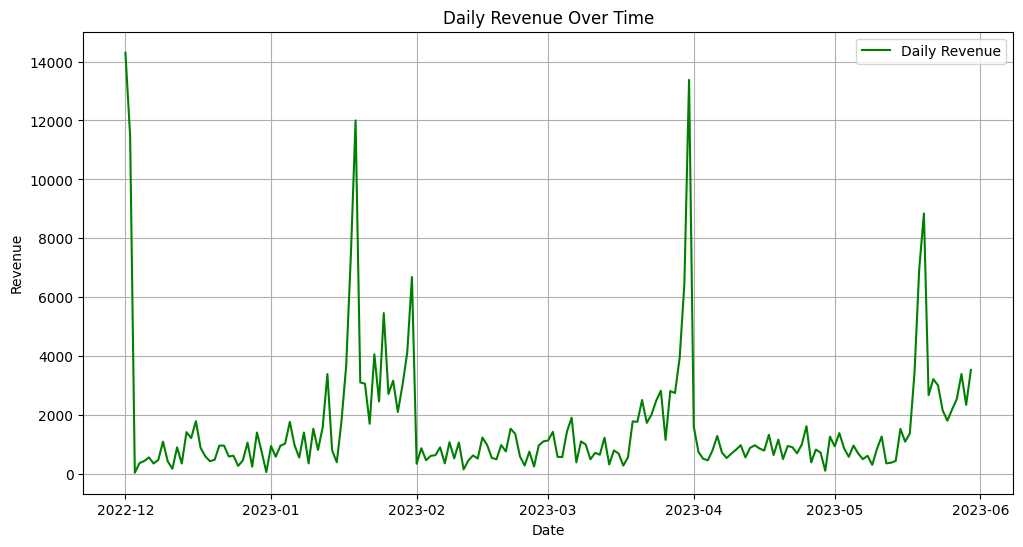

In [111]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df['purchase_date'], df['daily_revenue'], label='Daily Revenue', color='green')
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend()
plt.show()

## CUSTOMER LIFE TIME VALUE

In [112]:
query = """SELECT 
    AVG(total_spent) AS avg_user_revenue
FROM (
    SELECT user_id, SUM(purchase_price) AS total_spent
    FROM student_purchases
    WHERE purchase_price > 0
    GROUP BY user_id
) AS user_revenue;

"""

df = pd.read_sql(query,connection)
print(df)

   avg_user_revenue
0        114.939466


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\182421624.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


### Analyze Conversion Rates by Visitor Source

In [113]:
query = """

SELECT 
    fi.event_source_url,
    COUNT(DISTINCT fv.visitor_id) AS total_visitors,
    COUNT(DISTINCT fv.user_id) AS total_users,
    ROUND((COUNT(DISTINCT fv.user_id) * 100.0) / NULLIF(COUNT(DISTINCT fv.visitor_id), 0), 2) AS conversion_rate
FROM front_visitors fv
JOIN front_interactions fi ON fv.visitor_id = fi.visitor_id
GROUP BY fi.event_source_url
ORDER BY conversion_rate DESC;


"""

df = pd.read_sql(query,connection)
print(df)

C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\3821755986.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


                                        event_source_url  total_visitors  \
0      https://365financialanalyst.com/start-your-jou...               1   
1      https://365financialanalyst.com/start-your-jou...               1   
2      https://365financialanalyst.com/start-your-jou...               1   
3      https://365financialanalyst.com/start-your-jou...               1   
4      https://365financialanalyst.com/start-your-jou...               1   
...                                                  ...             ...   
66227  https://365datascience.com/courses/intro-to-da...               1   
66228  https://365datascience.com/courses/intro-to-da...               1   
66229  https://365datascience.com/courses/intro-to-da...               1   
66230  https://365datascience.com/courses/intro-to-da...               1   
66231  https://365datascience.com/courses/intro-to-da...               1   

       total_users  conversion_rate  
0                1            100.0  
1          

### Track Visitor Journey Using JOINS and Window Functions

In [114]:
query = """
WITH visitor_journey AS (
    SELECT 
        fi.visitor_id,
        fi.event_date,
        fi.event_source_url,
        fi.event_destination_url,
        ROW_NUMBER() OVER (PARTITION BY fi.visitor_id ORDER BY fi.event_date) AS step_number
    FROM front_interactions fi
    WHERE visitor_id = 12345  -- Replace with specific visitor_id
)
SELECT 
    visitor_id,
    step_number,
    event_date,
    event_source_url,
    event_destination_url
FROM visitor_journey
ORDER BY step_number;


"""

df = pd.read_sql(query,connection)
print(df)

C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\3953379191.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


Empty DataFrame
Columns: [visitor_id, step_number, event_date, event_source_url, event_destination_url]
Index: []


###  Revenue Contribution by Subscription Type Using Window Functions

In [115]:
query = """
WITH revenue_by_type AS (
    SELECT 
        purchase_type,
        SUM(purchase_price) AS total_revenue
    FROM student_purchases
    WHERE purchase_price > 0
    GROUP BY purchase_type
),
total_revenue AS (
    SELECT SUM(total_revenue) AS total_revenue_all
    FROM revenue_by_type
)
SELECT 
    rbt.purchase_type,
    rbt.total_revenue,
    ROUND((rbt.total_revenue / tr.total_revenue_all) * 100, 2) AS revenue_contribution
FROM revenue_by_type rbt
CROSS JOIN total_revenue tr
ORDER BY revenue_contribution DESC;


"""

df = pd.read_sql(query,connection)
print(df)

   purchase_type  total_revenue  revenue_contribution
0              2      247772.21                 83.36
1              0       41603.07                 14.00
2              1        7858.18                  2.64


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\4103829733.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


## Active User Retention Analysis Using CTEs

In [116]:
query = """
WITH user_purchases AS (
    SELECT 
        user_id,
        MIN(date_purchased) AS first_purchase_date,
        MAX(date_purchased) AS last_purchase_date,
        COUNT(purchase_id) AS purchase_count
    FROM student_purchases
    WHERE purchase_price > 0
    GROUP BY user_id
),
retention AS (
    SELECT 
        user_id,
        CASE 
            WHEN DATEDIFF(last_purchase_date, first_purchase_date) > 30 THEN 'Returning'
            ELSE 'One-Time'
        END AS retention_status
    FROM user_purchases
)
SELECT 
    retention_status,
    COUNT(user_id) AS user_count,
    ROUND((COUNT(user_id) * 100.0 / (SELECT COUNT(*) FROM user_purchases)), 2) AS percentage
FROM retention
GROUP BY retention_status;


"""

df = pd.read_sql(query,connection)
print(df)

  retention_status  user_count  percentage
0         One-Time        2230       86.23
1        Returning         356       13.77


C:\Users\nurec\AppData\Local\Temp\ipykernel_6616\1922152051.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)
